### Importing libraries

In [272]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import datetime


### reading data

In [273]:
df = pd.read_csv("Downloads/SALES - Sheet1.csv")

In [274]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ORDER_ITEM_NAME,DELIVERY_DATE,Quantity,Distinct Orders
1,Jowar & Ragi Gluten-free bread (700 g),2021-12-03 00:00:00,8,8
2,Multigrain Sandwich Loaf (400 g),2021-12-04 00:00:00,10,10
3,Multigrain Sandwich Loaf (400 g),2021-12-13 00:00:00,14,14
4,Walnut & Cranberry Sourdough Bread (500g),2021-12-24 00:00:00,3,3
...,...,...,...,...
456,Seed Feast Sourdough Bread (500 g),2021-12-21 00:00:00,1,1
457,Sourdough Sandwich Loaf Bread (650g),2021-12-21 00:00:00,3,3
458,Black Miche Sourdough Loaf,2021-12-09 00:00:00,2,2
459,Country Sourdough Bread (500g),2021-12-15 00:00:00,1,1


In [275]:
df. columns = df.iloc[0]

In [276]:
df.drop(0, inplace = True)

In [277]:
df.reset_index(inplace = True)

In [278]:
df.drop(['index'], axis = 1, inplace = True)

In [279]:
df.columns= ['item', 'delivery_date','quantity','distinct_order']

In [280]:
df.head()

,item,delivery_date,quantity,distinct_order
0,Jowar & Ragi Gluten-free bread (700 g),2021-12-03 00:00:00,8,8
1,Multigrain Sandwich Loaf (400 g),2021-12-04 00:00:00,10,10
2,Multigrain Sandwich Loaf (400 g),2021-12-13 00:00:00,14,14
3,Walnut & Cranberry Sourdough Bread (500g),2021-12-24 00:00:00,3,3
4,Jowar & Ragi Gluten-free bread (700 g),2021-12-15 00:00:00,10,10


### number of times items bought

In [281]:
total_times_bought = df['item'].value_counts()

In [282]:
total_times_bought = pd.DataFrame(total_times_bought)

In [283]:
total_times_bought

,item
Jowar & Ragi Gluten-free bread (700 g),31
Seeded Gluten Free Bread,30
Multigrain Sandwich Loaf (400 g),30
Whole Wheat Sandwich Loaf (400 g),30
Walnut & Cranberry Sourdough Bread (500g),30
Miche Whole Wheat Sourdough Bread (550g),29
Sourdough Sandwich Loaf Bread (650g),25
Everything Bagel (Pack of 2) + Cream Cheese (25 g),23
Bombay Ladi Pav (pack of 15),21
Country Sourdough Bread (500g),19


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   item            460 non-null    object
 1   delivery_date   460 non-null    object
 2   quantity        460 non-null    object
 3   distinct_order  460 non-null    object
dtypes: object(4)
memory usage: 14.5+ KB


### Extracting date and day 

In [285]:
df['date'] = '2021-12-01'

In [286]:
for i in range(len(df['delivery_date'])):
    df['date'][i] =df['delivery_date'][i][:10]

In [287]:
df.head()

,item,delivery_date,quantity,distinct_order,date
0,Jowar & Ragi Gluten-free bread (700 g),2021-12-03 00:00:00,8,8,2021-12-03
1,Multigrain Sandwich Loaf (400 g),2021-12-04 00:00:00,10,10,2021-12-04
2,Multigrain Sandwich Loaf (400 g),2021-12-13 00:00:00,14,14,2021-12-13
3,Walnut & Cranberry Sourdough Bread (500g),2021-12-24 00:00:00,3,3,2021-12-24
4,Jowar & Ragi Gluten-free bread (700 g),2021-12-15 00:00:00,10,10,2021-12-15


In [288]:
df.drop('delivery_date', axis = 1 , inplace = True)

In [289]:
df['Day'] = pd.DatetimeIndex(df['date']).day_name()

### Total quantity of an item bought

In [290]:
df['quantity'] = df['quantity'].astype('float')

In [291]:
total_quantity = df.groupby('item')['quantity'].sum()

In [292]:
total_quantity = pd.DataFrame(total_quantity)

### Dataframe containing total quantity sold and frequency 

In [293]:
new_df = pd.concat([total_times_bought, total_quantity], axis = 1)

In [294]:
type(total_quantity)

pandas.core.frame.DataFrame

In [295]:
new_df.head()

,item,quantity
Jowar & Ragi Gluten-free bread (700 g),31,193.0
Seeded Gluten Free Bread,30,112.0
Multigrain Sandwich Loaf (400 g),30,363.0
Whole Wheat Sandwich Loaf (400 g),30,166.0
Walnut & Cranberry Sourdough Bread (500g),30,87.0


In [296]:
new_df = new_df.sort_values(by = 'quantity', ascending = False)

In [297]:
new_df

,item,quantity
Multigrain Sandwich Loaf (400 g),30,363.0
Jowar & Ragi Gluten-free bread (700 g),31,193.0
Whole Wheat Sandwich Loaf (400 g),30,166.0
Seeded Gluten Free Bread,30,112.0
Walnut & Cranberry Sourdough Bread (500g),30,87.0
Miche Whole Wheat Sourdough Bread (550g),29,80.0
Sourdough Sandwich Loaf Bread (650g),25,62.0
Everything Bagel (Pack of 2) + Cream Cheese (25 g),23,50.0
French Baguette (16 inch - 350 g),19,40.0
Bombay Ladi Pav (pack of 15),21,34.0


In [298]:
df.date.value_counts()

2021-12-07    19
2021-12-18    18
2021-12-06    18
2021-12-03    18
2021-12-30    18
2021-12-20    17
2021-12-14    17
2021-12-21    17
2021-12-01    17
2021-12-11    17
2021-12-27    17
2021-12-08    16
2021-12-09    16
2021-12-15    16
2021-12-19    16
2021-12-23    16
2021-12-29    16
2021-12-16    15
2021-12-10    15
2021-12-17    15
2021-12-05    14
2021-12-25    14
2021-12-13    14
2021-12-24    14
2021-12-22    13
2021-12-02    13
2021-12-26    13
2021-12-04    12
2021-12-28    10
2021-12-12     9
Name: date, dtype: int64

In [299]:
df[df.date == '2021-12-07']

,item,quantity,distinct_order,date,Day
12,Multigrain Sandwich Loaf (400 g),10.0,10,2021-12-07,Tuesday
38,Whole Wheat Burger Buns (pack of 4),1.0,1,2021-12-07,Tuesday
64,Seed Feast Sourdough Bread (500 g),3.0,3,2021-12-07,Tuesday
68,Country Sourdough Bread (500g),1.0,1,2021-12-07,Tuesday
71,Gochujang (Korean Chilli Paste) and Sesame Loa...,1.0,1,2021-12-07,Tuesday
82,Seeded Gluten Free Bread,2.0,2,2021-12-07,Tuesday
85,Bombay Ladi Pav (pack of 15),2.0,2,2021-12-07,Tuesday
96,French Baguette (16 inch - 350 g),1.0,1,2021-12-07,Tuesday
160,Miche Whole Wheat Sourdough Bread (550g),1.0,1,2021-12-07,Tuesday
218,Whole Wheat Sandwich Loaf (400 g),14.0,14,2021-12-07,Tuesday


In [300]:
df.head()

,item,quantity,distinct_order,date,Day
0,Jowar & Ragi Gluten-free bread (700 g),8.0,8,2021-12-03,Friday
1,Multigrain Sandwich Loaf (400 g),10.0,10,2021-12-04,Saturday
2,Multigrain Sandwich Loaf (400 g),14.0,14,2021-12-13,Monday
3,Walnut & Cranberry Sourdough Bread (500g),3.0,3,2021-12-24,Friday
4,Jowar & Ragi Gluten-free bread (700 g),10.0,10,2021-12-15,Wednesday


In [301]:
quantity_by_date = (df.groupby('date')['quantity'].sum())

In [302]:
df[df.date == '2021-12-08']

,item,quantity,distinct_order,date,Day
5,Whole Wheat Sandwich Loaf (400 g),9.0,8,2021-12-08,Wednesday
58,Jowar & Ragi Gluten-free bread (700 g),13.0,13,2021-12-08,Wednesday
149,Bombay Ladi Pav (pack of 15),1.0,1,2021-12-08,Wednesday
175,Walnut & Cranberry Sourdough Bread (500g),4.0,4,2021-12-08,Wednesday
186,Seeded Gluten Free Bread,3.0,3,2021-12-08,Wednesday
213,Multigrain Sandwich Loaf (400 g),14.0,14,2021-12-08,Wednesday
227,Sourdough Sandwich Loaf Bread (650g),5.0,5,2021-12-08,Wednesday
232,"Olive, Sundried Tomato and Cheddar Loaf (350 g)",2.0,2,2021-12-08,Wednesday
252,French Baguette (16 inch - 350 g),2.0,2,2021-12-08,Wednesday
267,Classic French Style Sourdough Bread (500 g),1.0,1,2021-12-08,Wednesday


In [303]:
(df.groupby('Day')['quantity'].sum()).sort_values(ascending=False)

Day
Wednesday    282.0
Thursday     269.0
Monday       213.0
Saturday     204.0
Tuesday      179.0
Friday       175.0
Sunday       154.0
Name: quantity, dtype: float64

In [304]:
quantity_by_day = df.groupby('Day')['quantity'].sum()

In [305]:
quantity_by_date

date
2021-12-01    50.0
2021-12-02    49.0
2021-12-03    52.0
2021-12-04    53.0
2021-12-05    37.0
2021-12-06    56.0
2021-12-07    58.0
2021-12-08    70.0
2021-12-09    53.0
2021-12-10    42.0
2021-12-11    47.0
2021-12-12    31.0
2021-12-13    48.0
2021-12-14    48.0
2021-12-15    63.0
2021-12-16    46.0
2021-12-17    47.0
2021-12-18    63.0
2021-12-19    53.0
2021-12-20    56.0
2021-12-21    39.0
2021-12-22    44.0
2021-12-23    59.0
2021-12-24    34.0
2021-12-25    41.0
2021-12-26    33.0
2021-12-27    53.0
2021-12-28    34.0
2021-12-29    55.0
2021-12-30    62.0
Name: quantity, dtype: float64

## Visualization of data

### Item vs total quantity

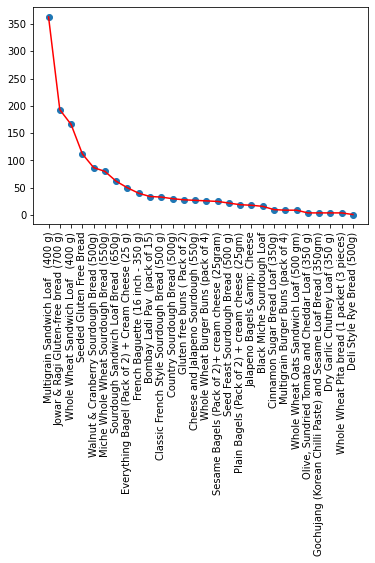

<Figure size 1440x1440 with 0 Axes>

In [316]:
plt.scatter(new_df.index, new_df.quantity)
plt.plot(new_df.index, new_df.quantity, color = 'r')
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))
plt.show()

### Total quantity vs date

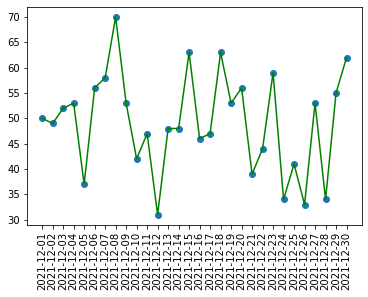

<Figure size 1440x1440 with 0 Axes>

In [317]:
plt.scatter(quantity_by_date.index, quantity_by_date)
plt.plot(quantity_by_date.index, quantity_by_date, color = 'g')
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))
plt.show()

### Total quantity vs Day

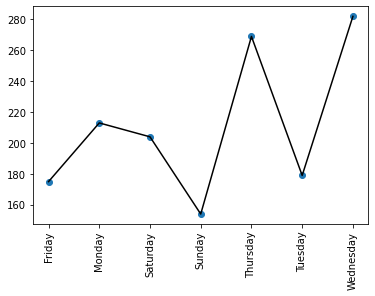

<Figure size 1440x1440 with 0 Axes>

In [318]:
plt.scatter(quantity_by_day.index, quantity_by_day)
plt.plot(quantity_by_day.index, quantity_by_day , color ='black')
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))
plt.show()

### week-wise analysis

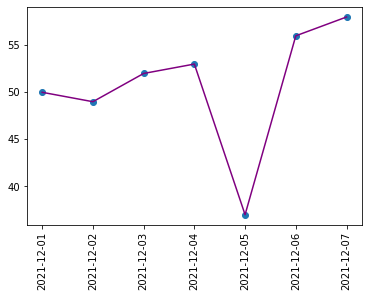

<Figure size 1440x1440 with 0 Axes>

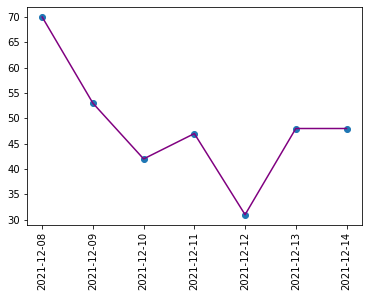

<Figure size 1440x1440 with 0 Axes>

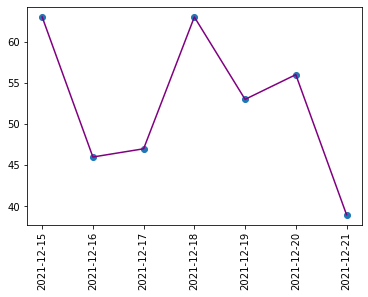

<Figure size 1440x1440 with 0 Axes>

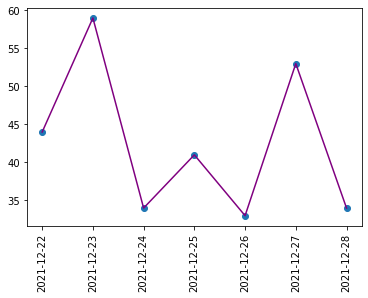

<Figure size 1440x1440 with 0 Axes>

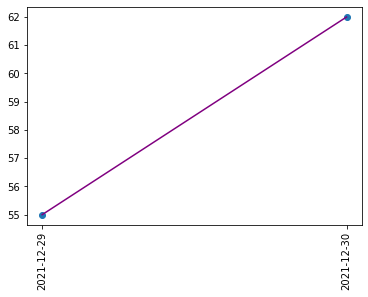

<Figure size 1440x1440 with 0 Axes>

In [319]:
i = 0
while i < len(quantity_by_date):
    k = quantity_by_date.iloc[i:i+7]
    plt.scatter(k.index, k)
    plt.plot(k.index, k, color = 'purple')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20,20))
    plt.show()
    i+=7

### Individual items total quantity vs Date

Jowar & Ragi Gluten-free bread (700 g)


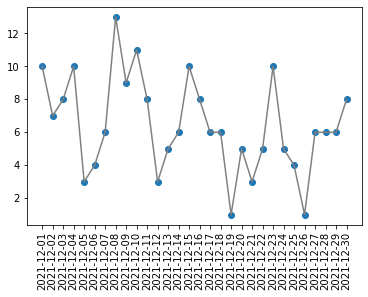

<Figure size 1440x1440 with 0 Axes>

Multigrain Sandwich Loaf   (400 g)


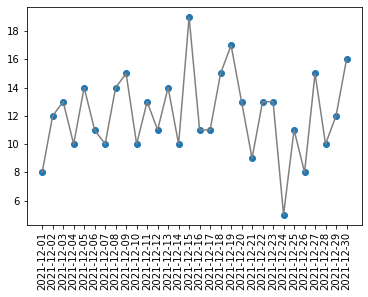

<Figure size 1440x1440 with 0 Axes>

Walnut & Cranberry Sourdough Bread (500g)


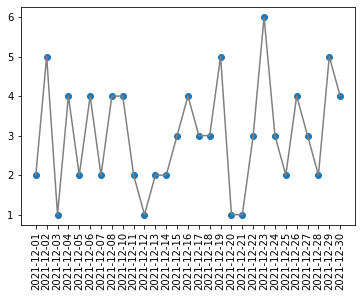

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Sandwich Loaf   (400 g)


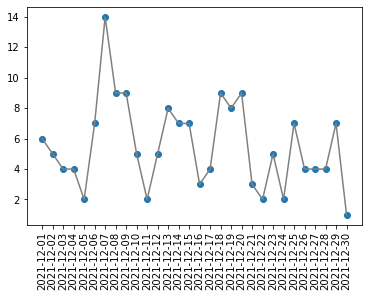

<Figure size 1440x1440 with 0 Axes>

Gluten free buns ( Pack of 2)


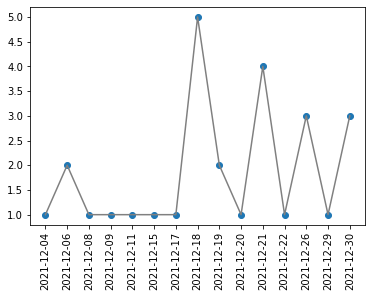

<Figure size 1440x1440 with 0 Axes>

Multigrain Burger Buns (pack of 4)


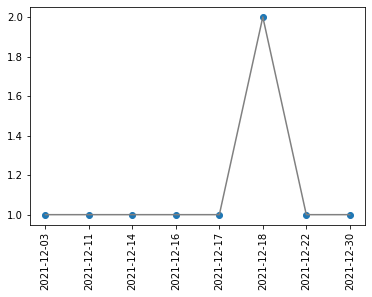

<Figure size 1440x1440 with 0 Axes>

Seeded Gluten Free Bread


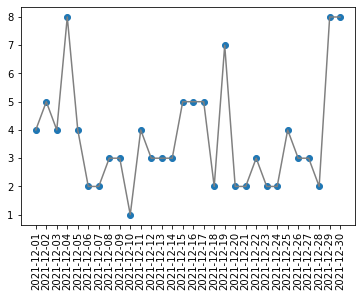

<Figure size 1440x1440 with 0 Axes>

Cheese and Jalapeno Sourdough (550g)


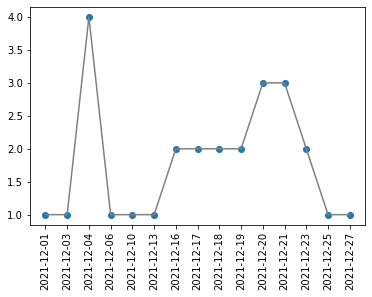

<Figure size 1440x1440 with 0 Axes>

French Baguette (16 inch - 350 g)


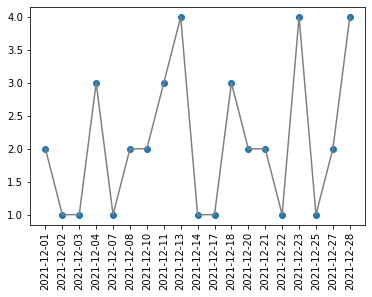

<Figure size 1440x1440 with 0 Axes>

Sesame Bagels (Pack of 2)+ cream cheese (25gram)


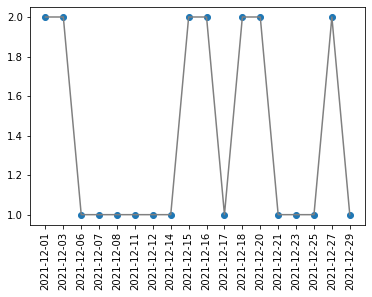

<Figure size 1440x1440 with 0 Axes>

Black Miche Sourdough Loaf


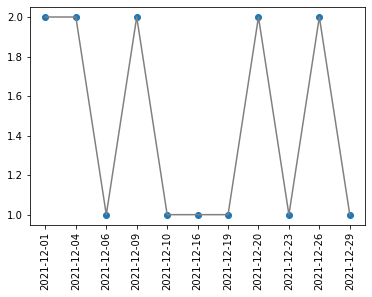

<Figure size 1440x1440 with 0 Axes>

Cinnamon Sugar Bread Loaf (350g)


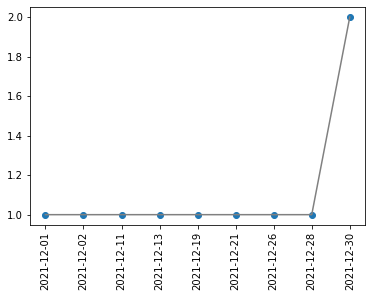

<Figure size 1440x1440 with 0 Axes>

Miche Whole Wheat Sourdough Bread (550g)


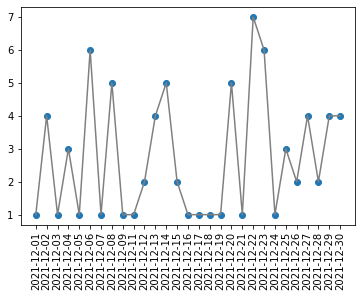

<Figure size 1440x1440 with 0 Axes>

Everything Bagel (Pack of 2) + Cream Cheese (25 g)


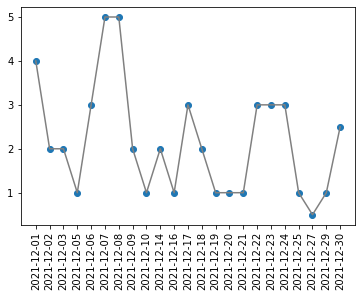

<Figure size 1440x1440 with 0 Axes>

Bombay Ladi Pav  (pack of 15)


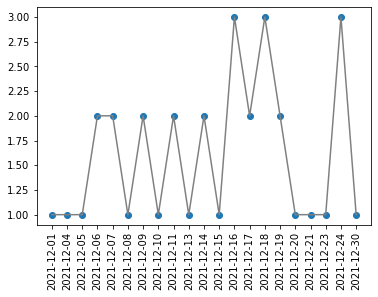

<Figure size 1440x1440 with 0 Axes>

Sourdough Sandwich Loaf Bread  (650g)


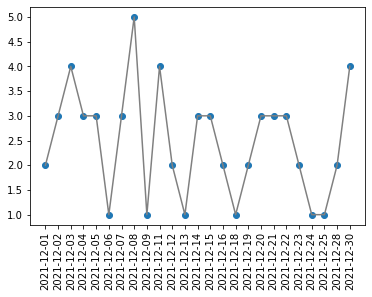

<Figure size 1440x1440 with 0 Axes>

Jalapeno Bagels &amp; Cheese


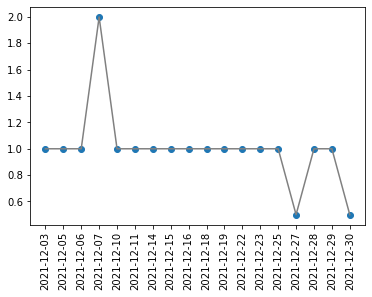

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Burger Buns (pack of 4)


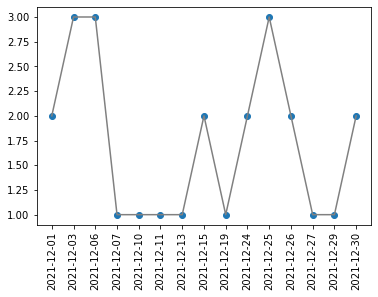

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Oats Sandwich Loaf (500 gm)


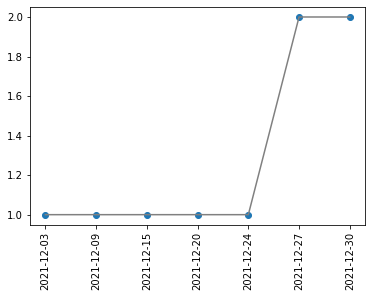

<Figure size 1440x1440 with 0 Axes>

Country Sourdough Bread (500g)


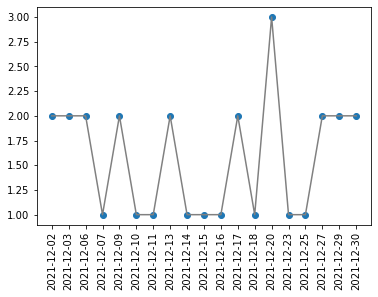

<Figure size 1440x1440 with 0 Axes>

Seed Feast Sourdough Bread (500 g)


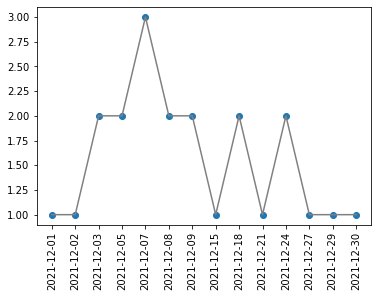

<Figure size 1440x1440 with 0 Axes>

Classic French Style Sourdough Bread (500 g)


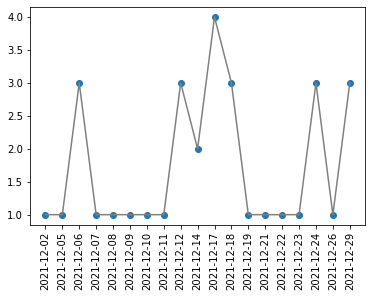

<Figure size 1440x1440 with 0 Axes>

Gochujang (Korean Chilli Paste) and Sesame Loaf Bread (350gm)


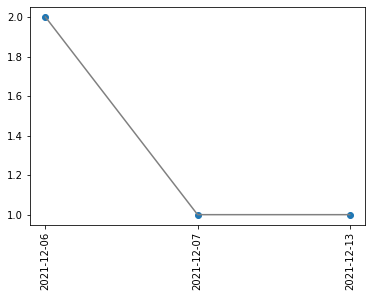

<Figure size 1440x1440 with 0 Axes>

Plain Bagels (Pack of 2) + cream cheese (25gm)


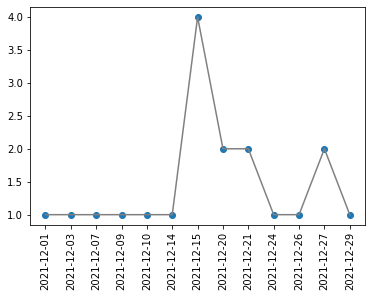

<Figure size 1440x1440 with 0 Axes>

Olive, Sundried Tomato and Cheddar Loaf (350 g)


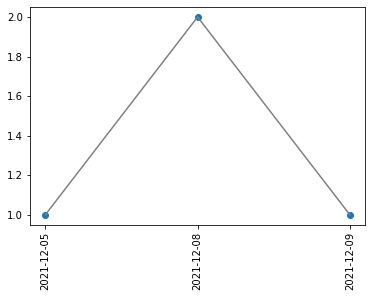

<Figure size 1440x1440 with 0 Axes>

Dry Garlic Chutney Loaf (350 g)


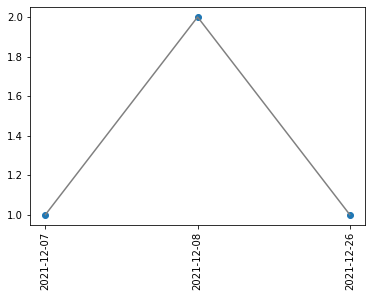

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Pita bread (1 packet (3 pieces)


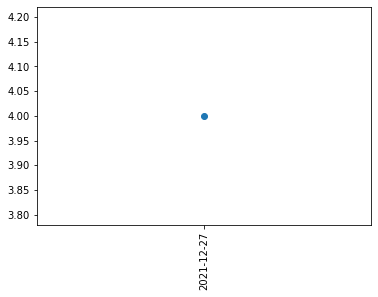

<Figure size 1440x1440 with 0 Axes>

Deli Style Rye Bread (500g)


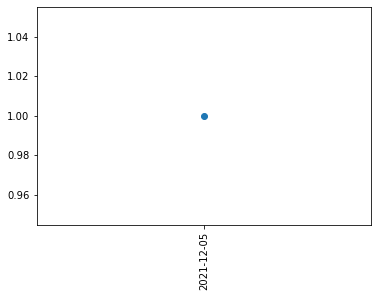

<Figure size 1440x1440 with 0 Axes>

In [327]:
for i in df.item.unique():
    print(i )
    new_ = df[df.item == i ].groupby('date')['quantity'].sum()
    plt.scatter(new_.index, new_)
    plt.plot(new_.index, new_, color ='grey')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20,20))
    plt.show()

### Individual items total quantity vs Day

Jowar & Ragi Gluten-free bread (700 g)


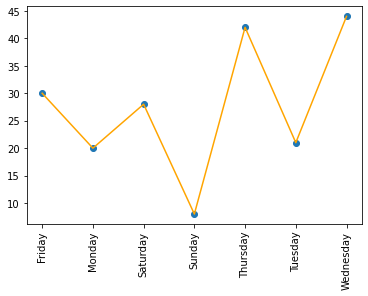

<Figure size 1440x1440 with 0 Axes>

Multigrain Sandwich Loaf   (400 g)


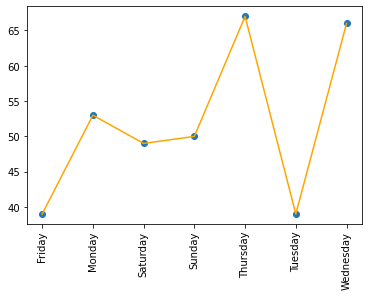

<Figure size 1440x1440 with 0 Axes>

Walnut & Cranberry Sourdough Bread (500g)


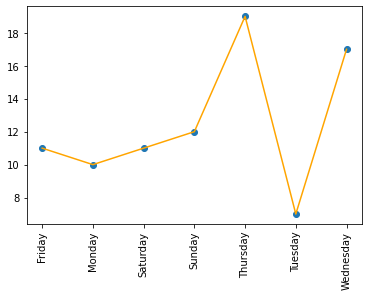

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Sandwich Loaf   (400 g)


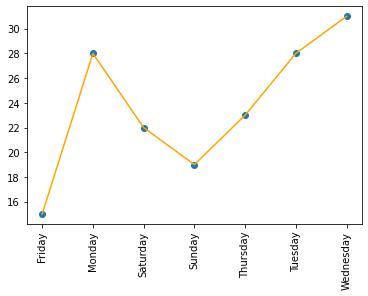

<Figure size 1440x1440 with 0 Axes>

Gluten free buns ( Pack of 2)


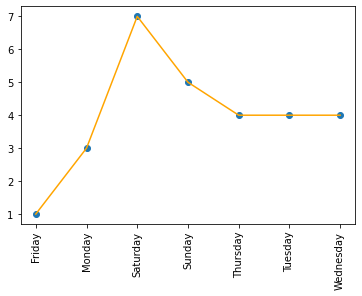

<Figure size 1440x1440 with 0 Axes>

Multigrain Burger Buns (pack of 4)


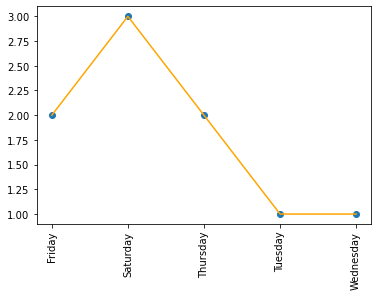

<Figure size 1440x1440 with 0 Axes>

Seeded Gluten Free Bread


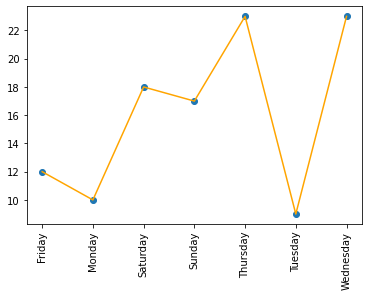

<Figure size 1440x1440 with 0 Axes>

Cheese and Jalapeno Sourdough (550g)


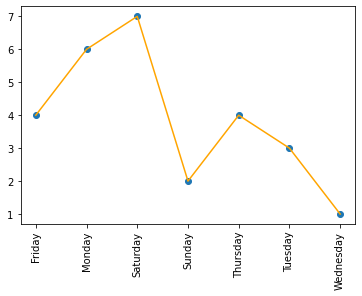

<Figure size 1440x1440 with 0 Axes>

French Baguette (16 inch - 350 g)


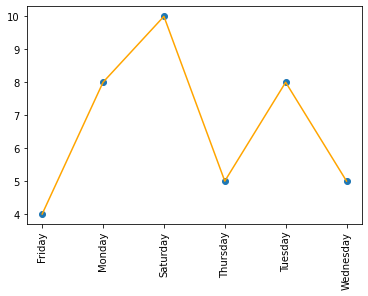

<Figure size 1440x1440 with 0 Axes>

Sesame Bagels (Pack of 2)+ cream cheese (25gram)


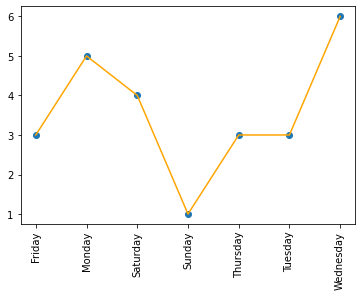

<Figure size 1440x1440 with 0 Axes>

Black Miche Sourdough Loaf


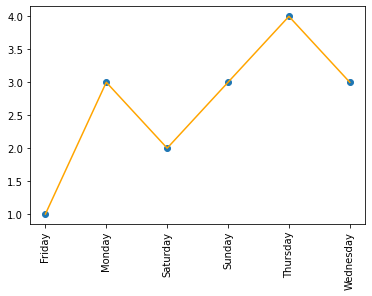

<Figure size 1440x1440 with 0 Axes>

Cinnamon Sugar Bread Loaf (350g)


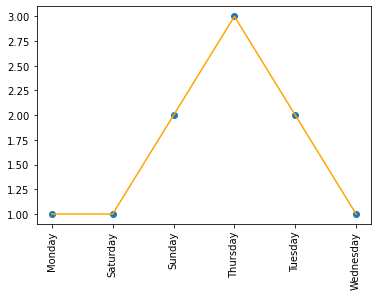

<Figure size 1440x1440 with 0 Axes>

Miche Whole Wheat Sourdough Bread (550g)


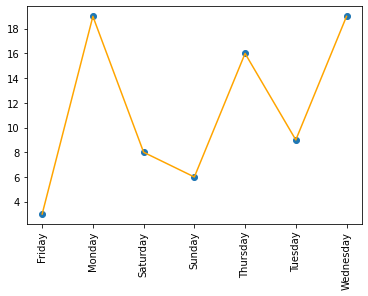

<Figure size 1440x1440 with 0 Axes>

Everything Bagel (Pack of 2) + Cream Cheese (25 g)


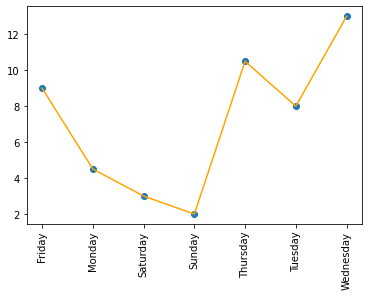

<Figure size 1440x1440 with 0 Axes>

Bombay Ladi Pav  (pack of 15)


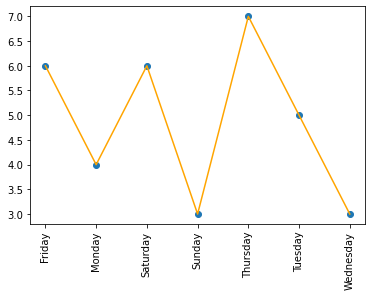

<Figure size 1440x1440 with 0 Axes>

Sourdough Sandwich Loaf Bread  (650g)


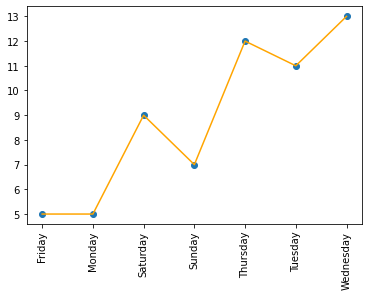

<Figure size 1440x1440 with 0 Axes>

Jalapeno Bagels &amp; Cheese


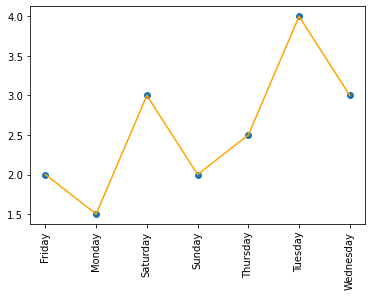

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Burger Buns (pack of 4)


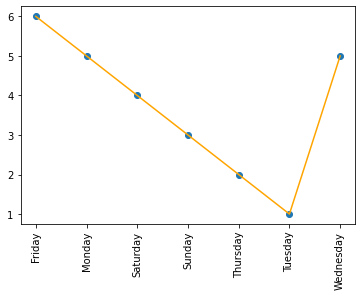

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Oats Sandwich Loaf (500 gm)


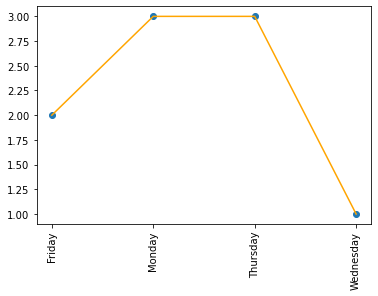

<Figure size 1440x1440 with 0 Axes>

Country Sourdough Bread (500g)


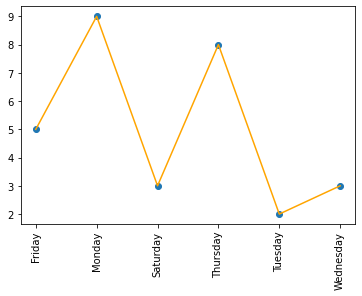

<Figure size 1440x1440 with 0 Axes>

Seed Feast Sourdough Bread (500 g)


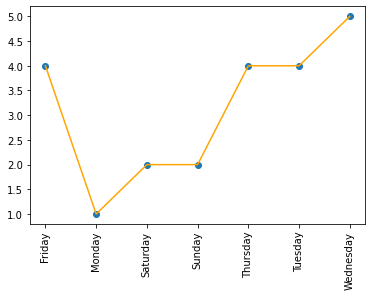

<Figure size 1440x1440 with 0 Axes>

Classic French Style Sourdough Bread (500 g)


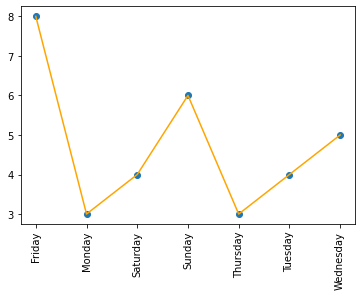

<Figure size 1440x1440 with 0 Axes>

Gochujang (Korean Chilli Paste) and Sesame Loaf Bread (350gm)


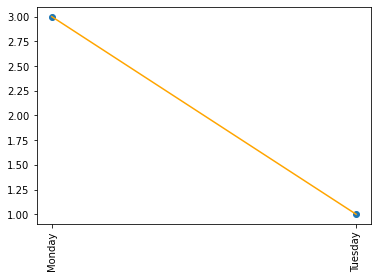

<Figure size 1440x1440 with 0 Axes>

Plain Bagels (Pack of 2) + cream cheese (25gm)


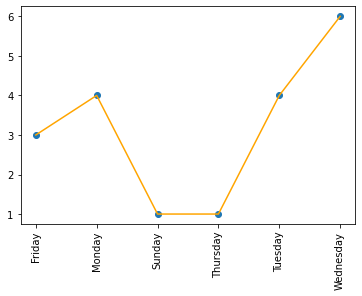

<Figure size 1440x1440 with 0 Axes>

Olive, Sundried Tomato and Cheddar Loaf (350 g)


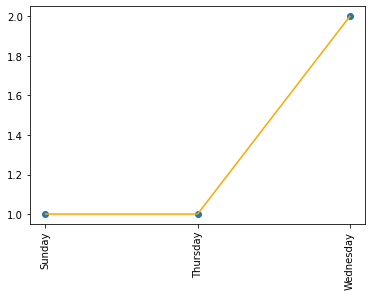

<Figure size 1440x1440 with 0 Axes>

Dry Garlic Chutney Loaf (350 g)


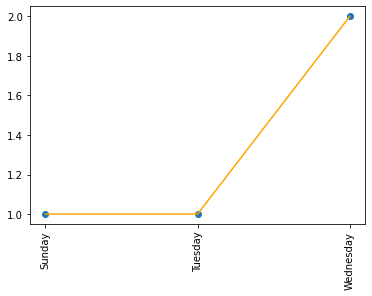

<Figure size 1440x1440 with 0 Axes>

Whole Wheat Pita bread (1 packet (3 pieces)


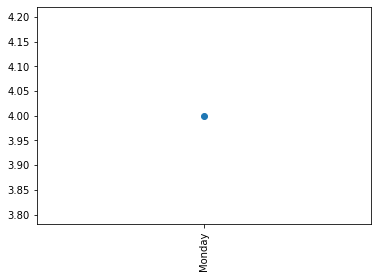

<Figure size 1440x1440 with 0 Axes>

Deli Style Rye Bread (500g)


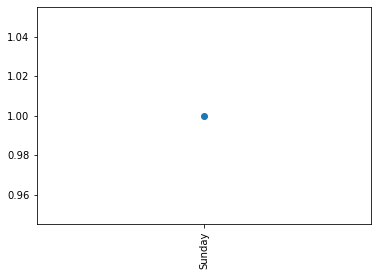

<Figure size 1440x1440 with 0 Axes>

In [330]:
for i in df.item.unique():
    print(i )
    new_ = df[df.item == i ].groupby('Day')['quantity'].sum()
    plt.scatter(new_.index, new_)
    plt.plot(new_.index, new_, color ='orange')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20,20))
    plt.show()

### Total quantity vs next 7 Days

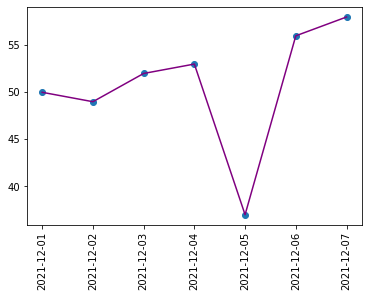

<Figure size 1440x1440 with 0 Axes>

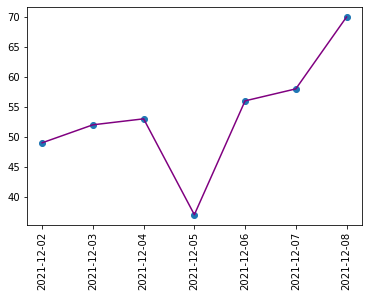

<Figure size 1440x1440 with 0 Axes>

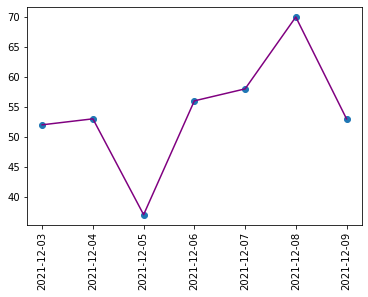

<Figure size 1440x1440 with 0 Axes>

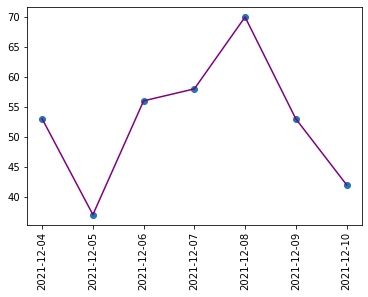

<Figure size 1440x1440 with 0 Axes>

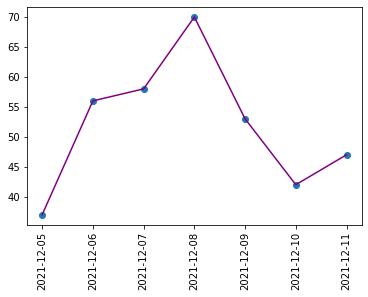

<Figure size 1440x1440 with 0 Axes>

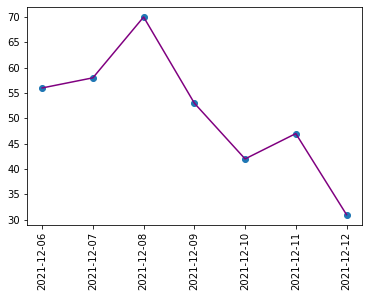

<Figure size 1440x1440 with 0 Axes>

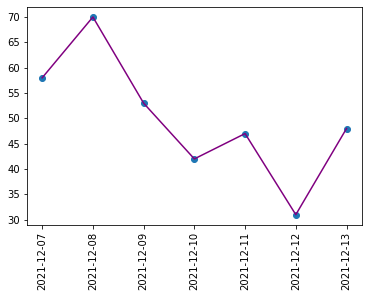

<Figure size 1440x1440 with 0 Axes>

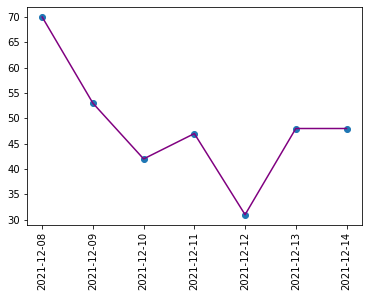

<Figure size 1440x1440 with 0 Axes>

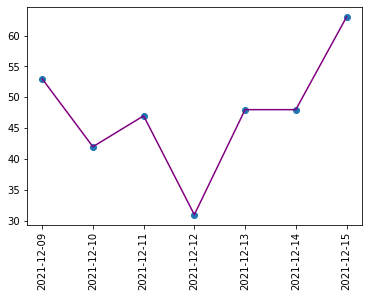

<Figure size 1440x1440 with 0 Axes>

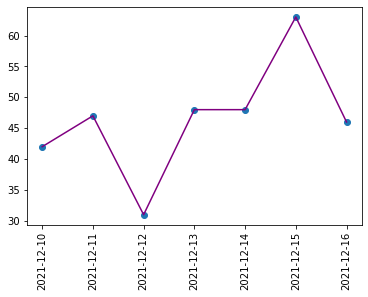

<Figure size 1440x1440 with 0 Axes>

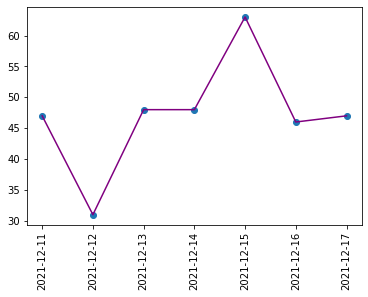

<Figure size 1440x1440 with 0 Axes>

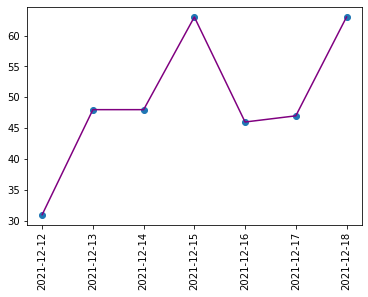

<Figure size 1440x1440 with 0 Axes>

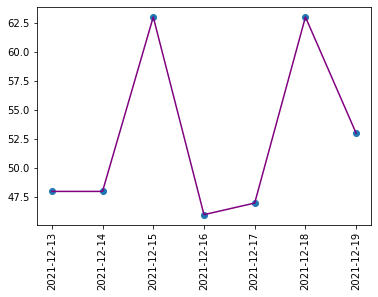

<Figure size 1440x1440 with 0 Axes>

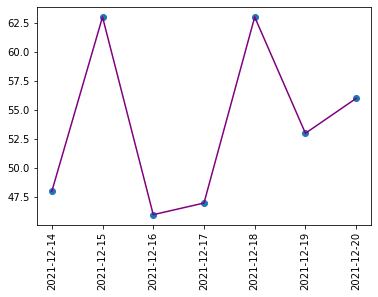

<Figure size 1440x1440 with 0 Axes>

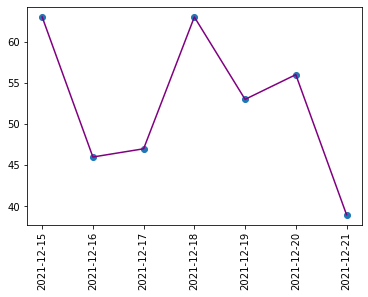

<Figure size 1440x1440 with 0 Axes>

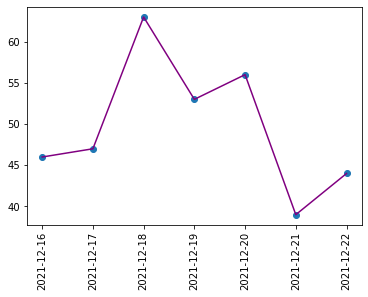

<Figure size 1440x1440 with 0 Axes>

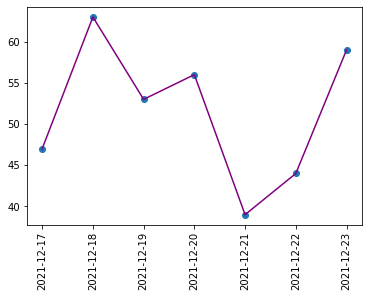

<Figure size 1440x1440 with 0 Axes>

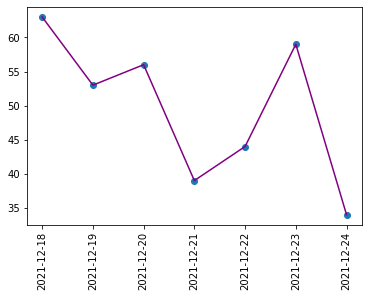

<Figure size 1440x1440 with 0 Axes>

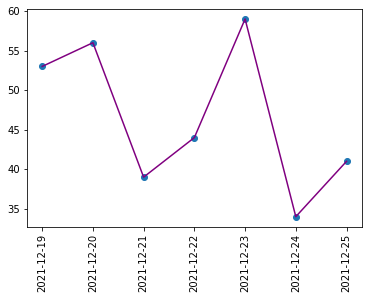

<Figure size 1440x1440 with 0 Axes>

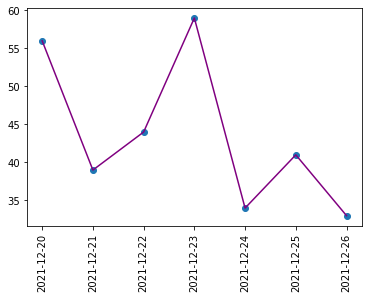

<Figure size 1440x1440 with 0 Axes>

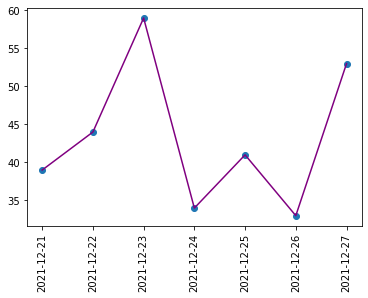

<Figure size 1440x1440 with 0 Axes>

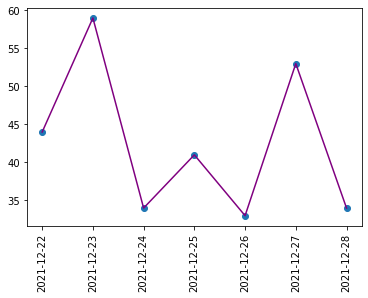

<Figure size 1440x1440 with 0 Axes>

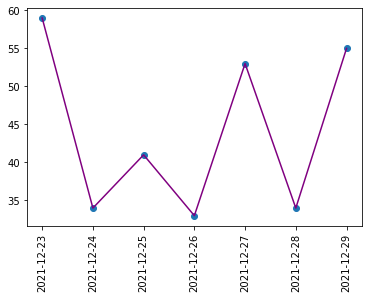

<Figure size 1440x1440 with 0 Axes>

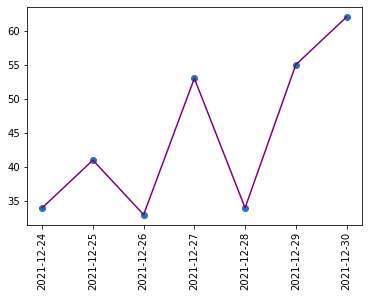

<Figure size 1440x1440 with 0 Axes>

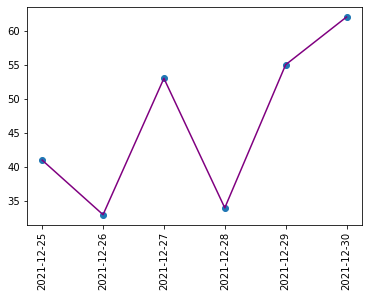

<Figure size 1440x1440 with 0 Axes>

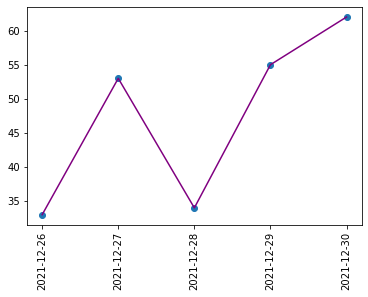

<Figure size 1440x1440 with 0 Axes>

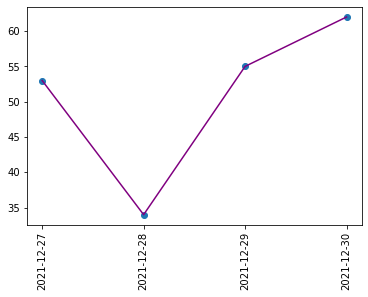

<Figure size 1440x1440 with 0 Axes>

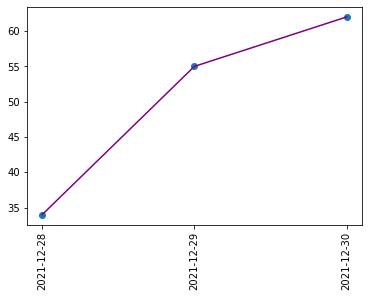

<Figure size 1440x1440 with 0 Axes>

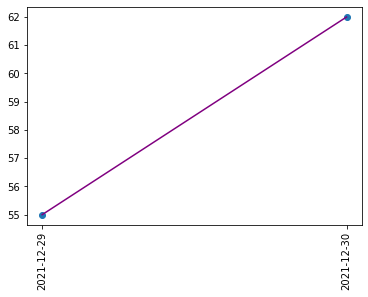

<Figure size 1440x1440 with 0 Axes>

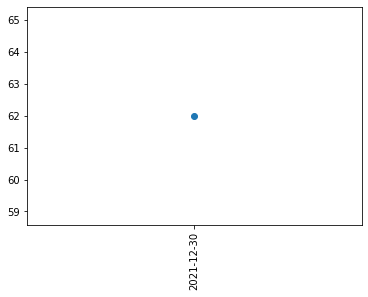

<Figure size 1440x1440 with 0 Axes>

In [333]:
for i in range(len(quantity_by_date)):
    k = quantity_by_date.iloc[i:i+7]
    plt.scatter(k.index, k)
    plt.plot(k.index, k, color ='purple')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20,20))
    plt.show()

### Average quantity vs next 7 Days

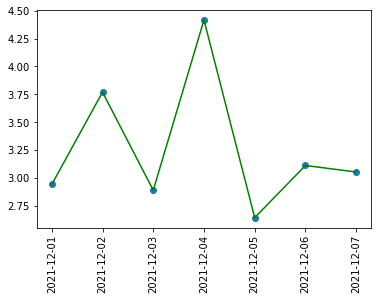

<Figure size 1440x1440 with 0 Axes>

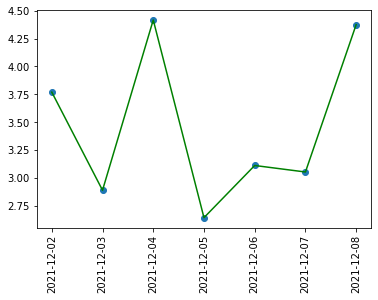

<Figure size 1440x1440 with 0 Axes>

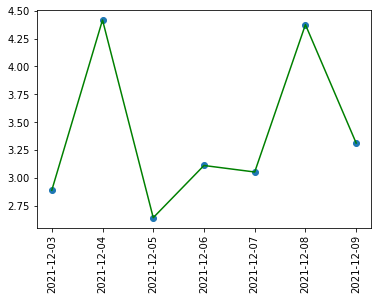

<Figure size 1440x1440 with 0 Axes>

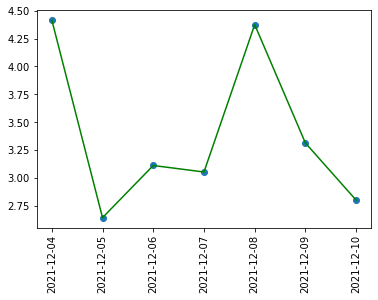

<Figure size 1440x1440 with 0 Axes>

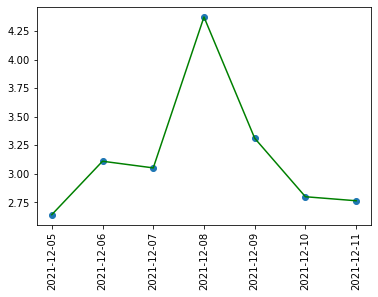

<Figure size 1440x1440 with 0 Axes>

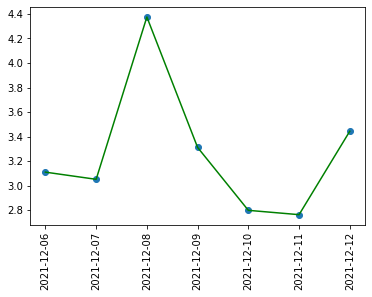

<Figure size 1440x1440 with 0 Axes>

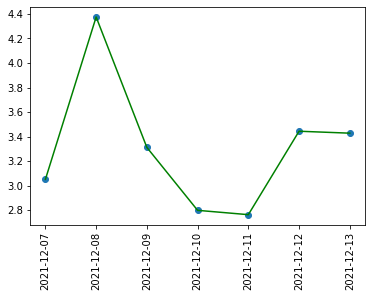

<Figure size 1440x1440 with 0 Axes>

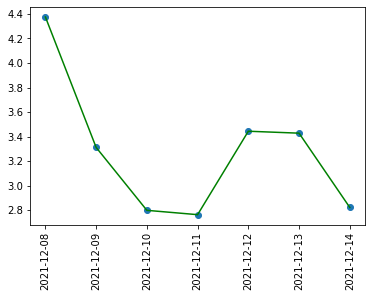

<Figure size 1440x1440 with 0 Axes>

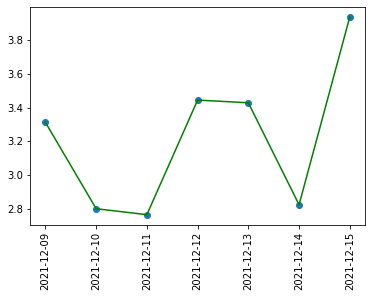

<Figure size 1440x1440 with 0 Axes>

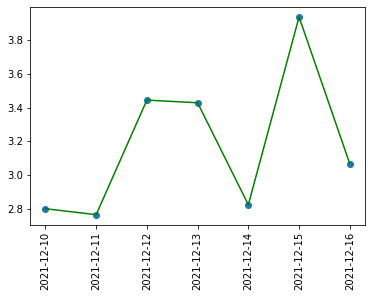

<Figure size 1440x1440 with 0 Axes>

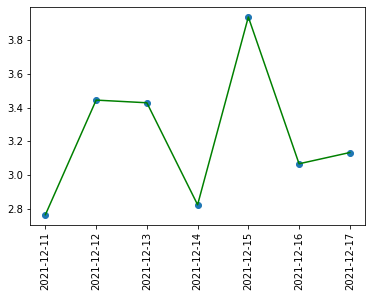

<Figure size 1440x1440 with 0 Axes>

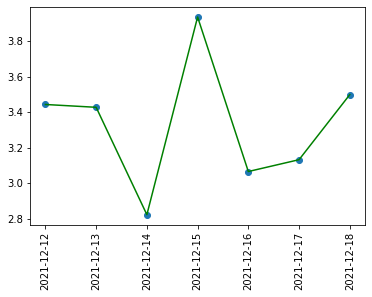

<Figure size 1440x1440 with 0 Axes>

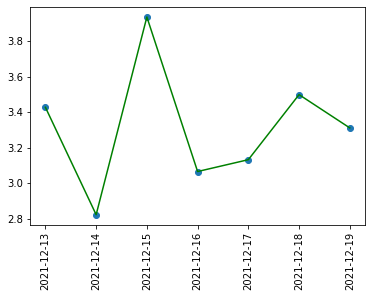

<Figure size 1440x1440 with 0 Axes>

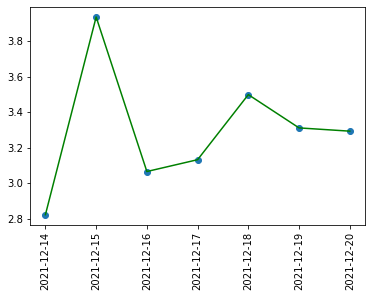

<Figure size 1440x1440 with 0 Axes>

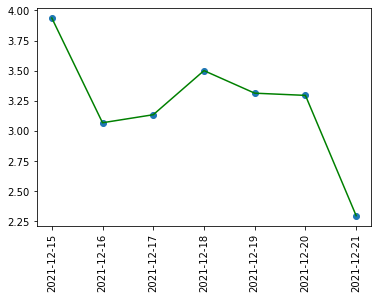

<Figure size 1440x1440 with 0 Axes>

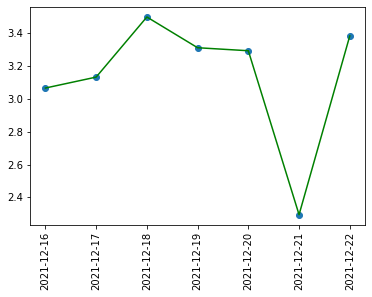

<Figure size 1440x1440 with 0 Axes>

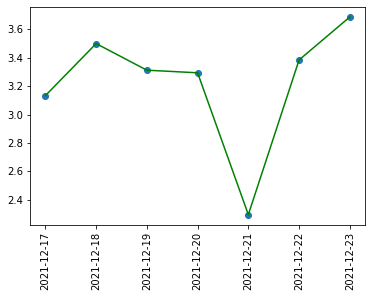

<Figure size 1440x1440 with 0 Axes>

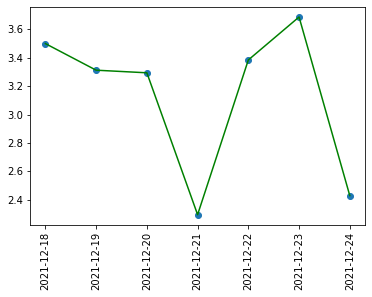

<Figure size 1440x1440 with 0 Axes>

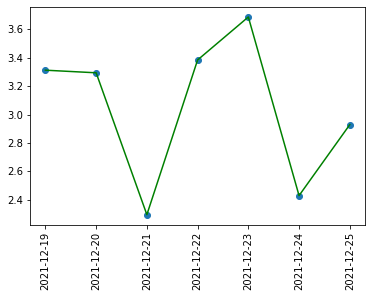

<Figure size 1440x1440 with 0 Axes>

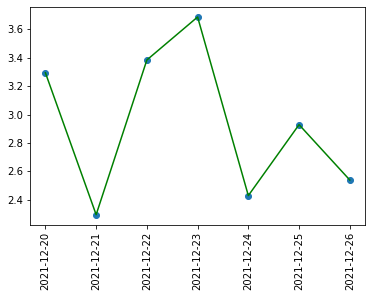

<Figure size 1440x1440 with 0 Axes>

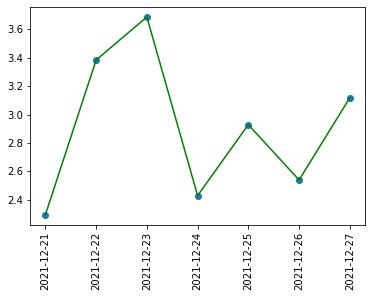

<Figure size 1440x1440 with 0 Axes>

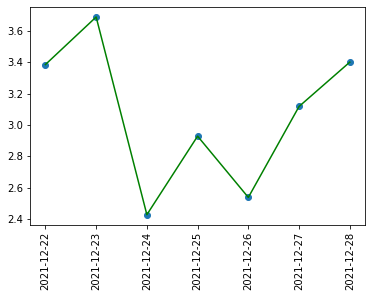

<Figure size 1440x1440 with 0 Axes>

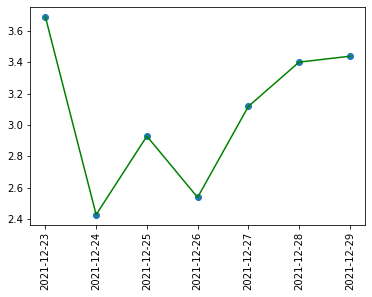

<Figure size 1440x1440 with 0 Axes>

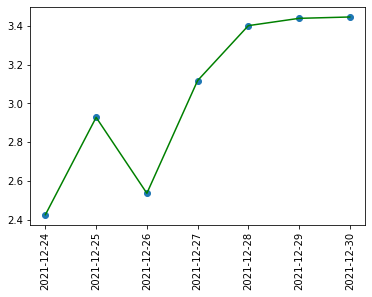

<Figure size 1440x1440 with 0 Axes>

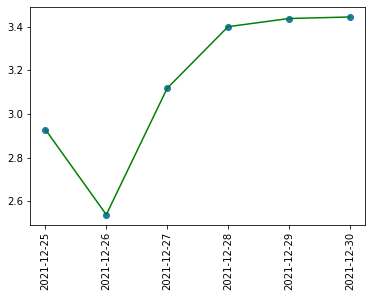

<Figure size 1440x1440 with 0 Axes>

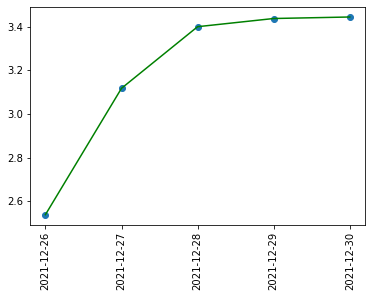

<Figure size 1440x1440 with 0 Axes>

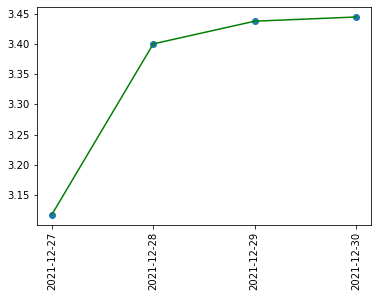

<Figure size 1440x1440 with 0 Axes>

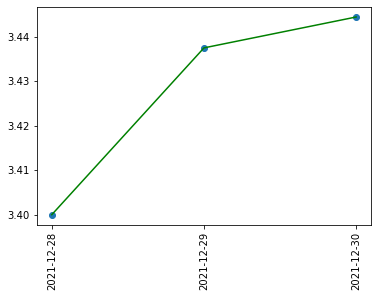

<Figure size 1440x1440 with 0 Axes>

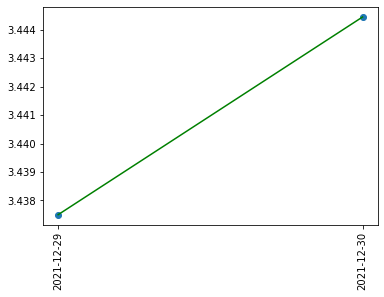

<Figure size 1440x1440 with 0 Axes>

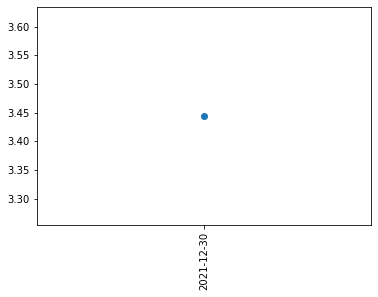

<Figure size 1440x1440 with 0 Axes>

In [322]:
quantity_by_date_avg = (df.groupby('date')['quantity'].mean())
for i in range(len(quantity_by_date)):
    k = quantity_by_date_avg.iloc[i:i+7]
    plt.scatter(k.index, k)
    plt.plot(k.index, k, color = 'green')
    plt.xticks(rotation=90)
    plt.figure(figsize=(20,20))
    plt.show()